In [ ]:
# install pandas
%pip install pandas
%pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# session 1 - 07.05.25 participants Hannah, Lena, Paula, Katharina
# 1 Data set selection 

import pandas as pd

# load data frame
df = pd.read_csv(r"alzheimerdata_with_missing_values.csv")

# get overview 
df.head()
df.info()

# number of columns and rows
df.shape
# we have 2149 rows and 35 columns

# culumn names
df.columns

# why did we choose this data frame?
# Information about the data set
# This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. 
# The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and 
# functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data 
# scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

# contains numerical (AlcoholConsumption, PhysicalActivity, SleepQuality,...); categorical data (Gender, Ethnicity, EducationLevel, Smoking,...)
# includes more than 10 input variablen -> 34
# clearly defined target variable: Diagnosis (0 = no Alzheimer; 1 = Alzheimer)
# sufficient size -> 2149 rows
# complexity: medical, demographical and cognitive data

# suitability: cleary defined binary target variable; sufficient input variables (features), sufficient size

# limitations:
# missing values?
print(df.isnull().values.sum())
# we have 7116 missing values

# ethical considerations
# sensitive data including phyical and medical health indicators - e.g. Alzheimer, Ethnicity, Depression 

# potential bias possible in ethnicity as the mayority is caucasian 
# Also distribution in just 4 ethnicity groups shows possible limitation of the data
# gender seems to be equally distributed


# Check demografic variables
gender_distribution = df['Gender'].value_counts()
age_distribution = df['Age'].describe()  # Geben Sie eine Zusammenfassung des Alters

# check for bias
print("Geschlechterverteilung:\n", gender_distribution)
print("\nAltersverteilung:\n", age_distribution)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     1986 non-null   float64
 3   Ethnicity                  1729 non-null   float64
 4   EducationLevel             2149 non-null   float64
 5   BMI                        1993 non-null   float64
 6   Smoking                    1629 non-null   float64
 7   AlcoholConsumption         1623 non-null   float64
 8   PhysicalActivity           1637 non-null   float64
 9   DietQuality                1857 non-null   float64
 10  SleepQuality               2111 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   float64
 12  CardiovascularDisease      2099 non-null   float64
 13  Diabetes                   2149 non-null   int64

In [33]:
# Task 2 EDA (participants: Lena, Hannah, Paula, Katharina date: 14.05.25)

# statistics of data
# print(df.dtypes)
column_numerical = ['Age', 'BMI', "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment", "ADL"]
# df[column_numerical].mean()

statistic_df = pd.DataFrame({
    'Mittelwert': df[column_numerical].mean(),
    'Median': df[column_numerical].median(),
    'SD': df[column_numerical].std()
})

print(statistic_df)

# missingness rates
# count missing values in df
print(df.isnull().values.sum())

# Check across each column
df.isnull().any()

# Check if missing values in each column
df.isna().sum().sort_values(ascending=False)


                          Mittelwert      Median          SD
Age                        74.908795   75.000000    8.990221
BMI                        27.677215   27.827454    7.202416
AlcoholConsumption         10.112686    9.948911    5.766248
PhysicalActivity            4.863149    4.593486    2.886373
DietQuality                 4.975564    5.101519    2.900015
SleepQuality                7.045200    7.098455    1.762432
SystolicBP                134.264774  134.000000   25.949352
DiastolicBP                89.751486   90.000000   17.725012
CholesterolTotal          224.940202  225.020797   42.145856
CholesterolLDL            124.335944  123.342593   43.366584
CholesterolHDL             59.528296   59.584244   23.026433
CholesterolTriglycerides  227.844575  230.783029  102.458384
MMSE                       14.725339   14.421212    8.614748
FunctionalAssessment        5.080055    5.094439    2.892743
ADL                         4.976182    5.034117    2.951808
7116


Diagnosis                    667
DoctorInCharge               654
PersonalityChanges           563
AlcoholConsumption           526
Smoking                      520
PhysicalActivity             512
Ethnicity                    420
CholesterolTriglycerides     419
MemoryComplaints             317
CholesterolTotal             304
HeadInjury                   302
DiastolicBP                  298
DietQuality                  292
Disorientation               244
Hypertension                 192
CholesterolHDL               186
Gender                       163
BMI                          156
MMSE                         126
Depression                    80
Forgetfulness                 68
CardiovascularDisease         50
SleepQuality                  38
ADL                           19
Confusion                      0
DifficultyCompletingTasks      0
PatientID                      0
BehavioralProblems             0
FunctionalAssessment           0
CholesterolLDL                 0
Age       

In [ ]:
%pip install missingno==0.5.2
import missingno as msno

<Axes: >

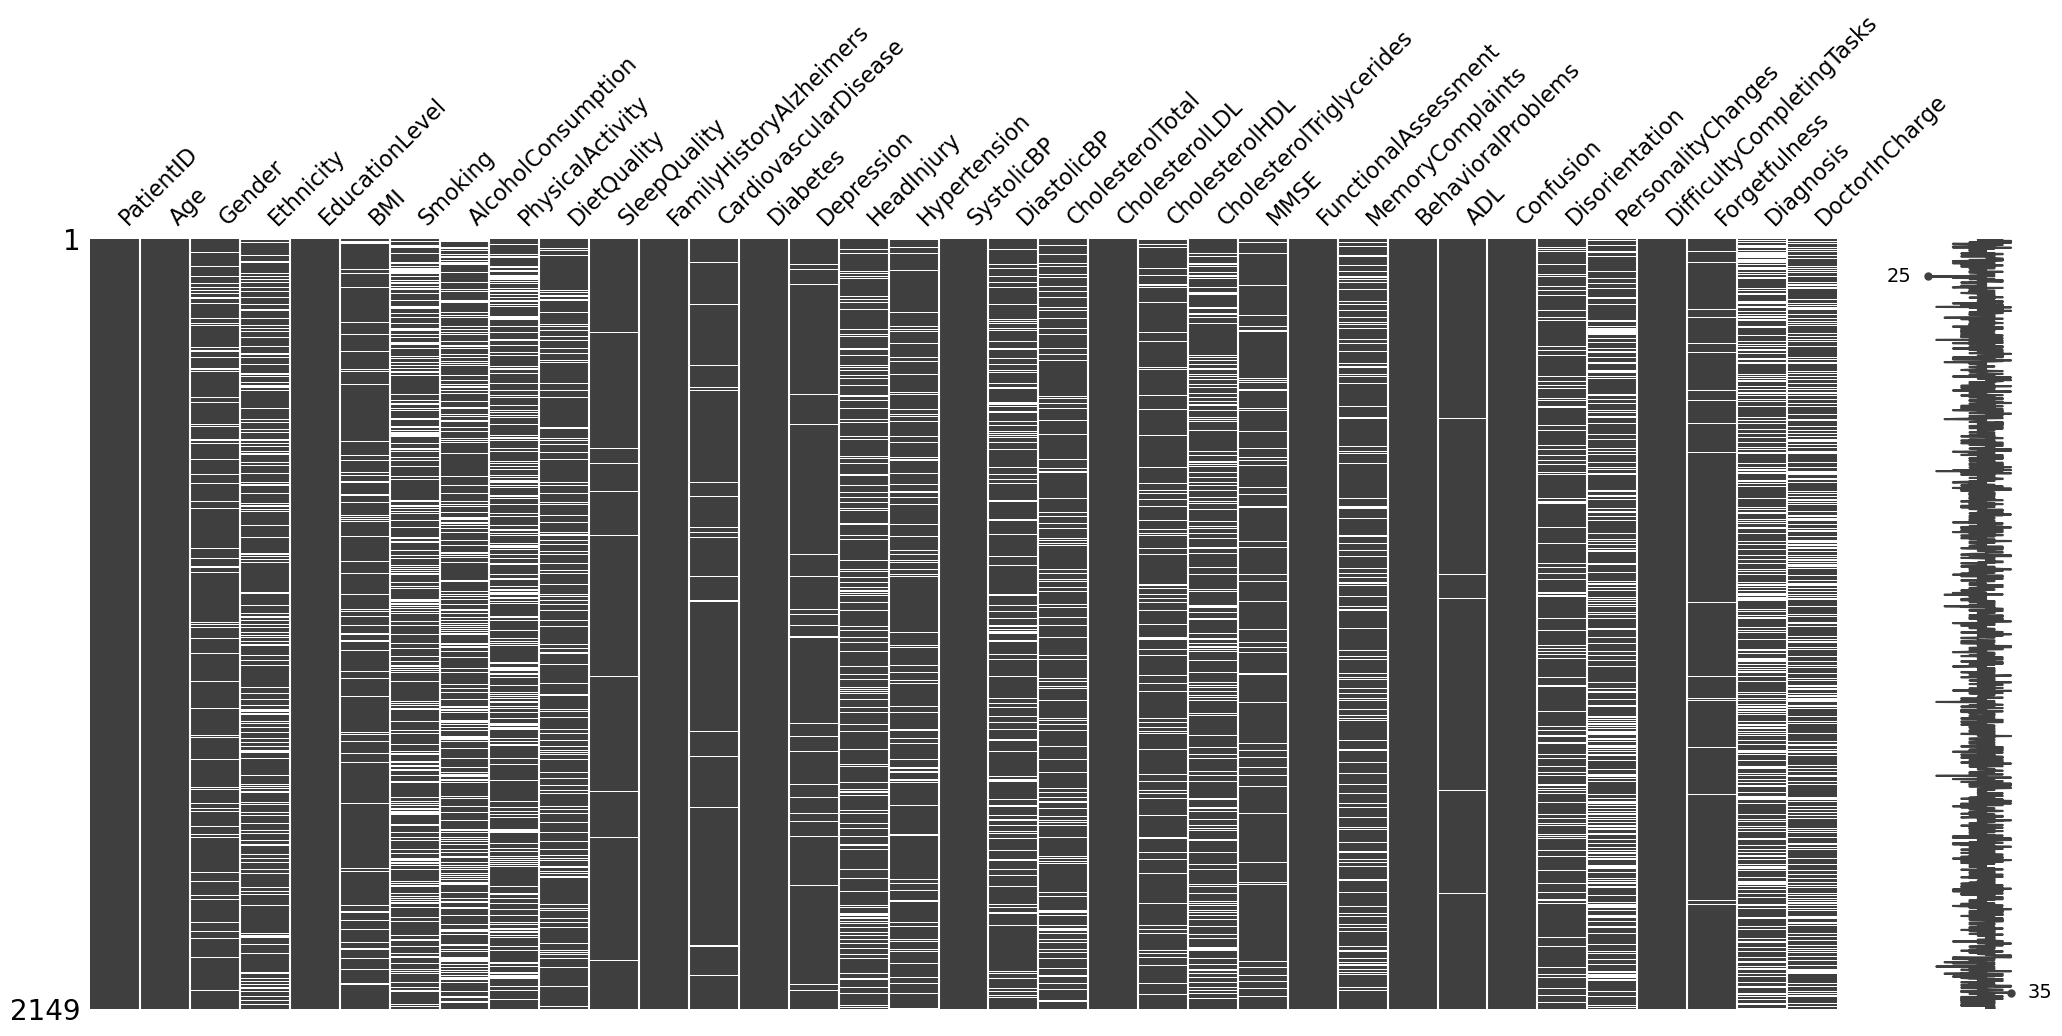

In [35]:
#Visualize missing values as a matrix
msno.matrix(df)



<Axes: >

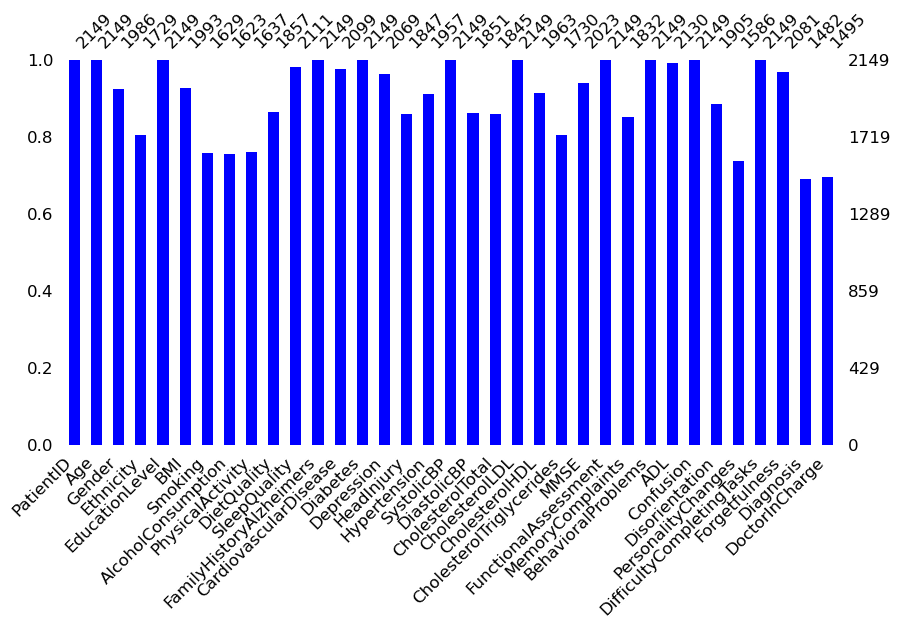

In [36]:
#Visualize missing values as a bar
msno.bar(df, figsize=(10, 5), fontsize=12,
color='blue')

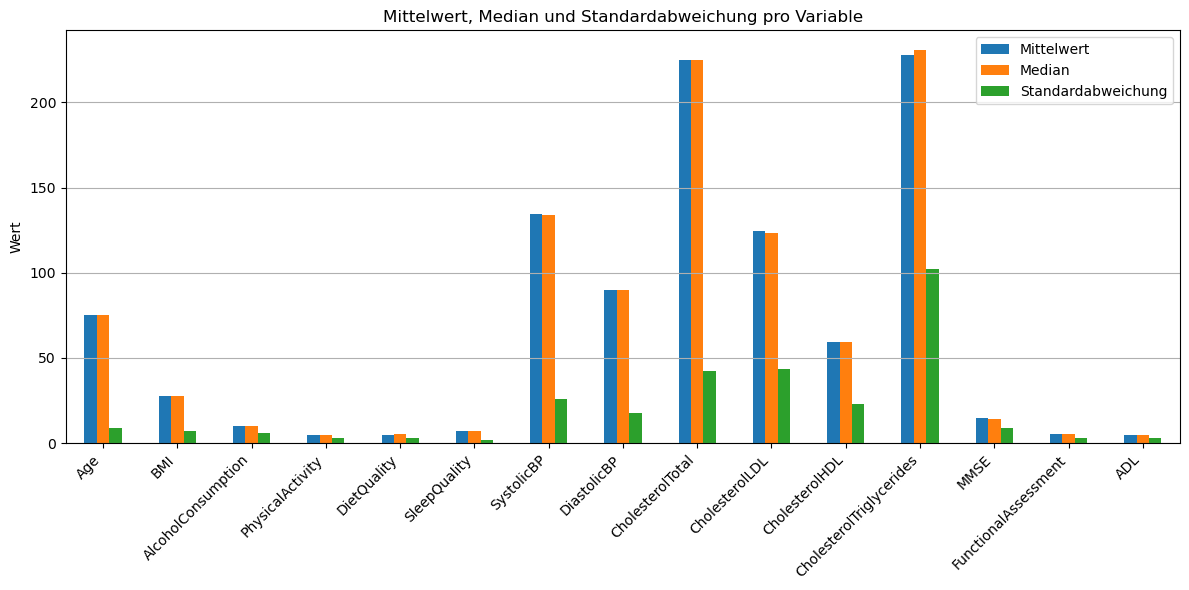

In [39]:
# Statistiken berechnen
means = df[column_numerical].mean()
medians = df[column_numerical].median()
stds = df[column_numerical].std()

# Kombinieren in ein DataFrame für die Visualisierung
stat_df = pd.DataFrame({
    'Mittelwert': means,
    'Median': medians,
    'Standardabweichung': stds
})

# Plotten
stat_df.plot(kind='bar', figsize=(12, 6))
plt.title('Mittelwert, Median und Standardabweichung pro Variable')
plt.ylabel('Wert')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [45]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


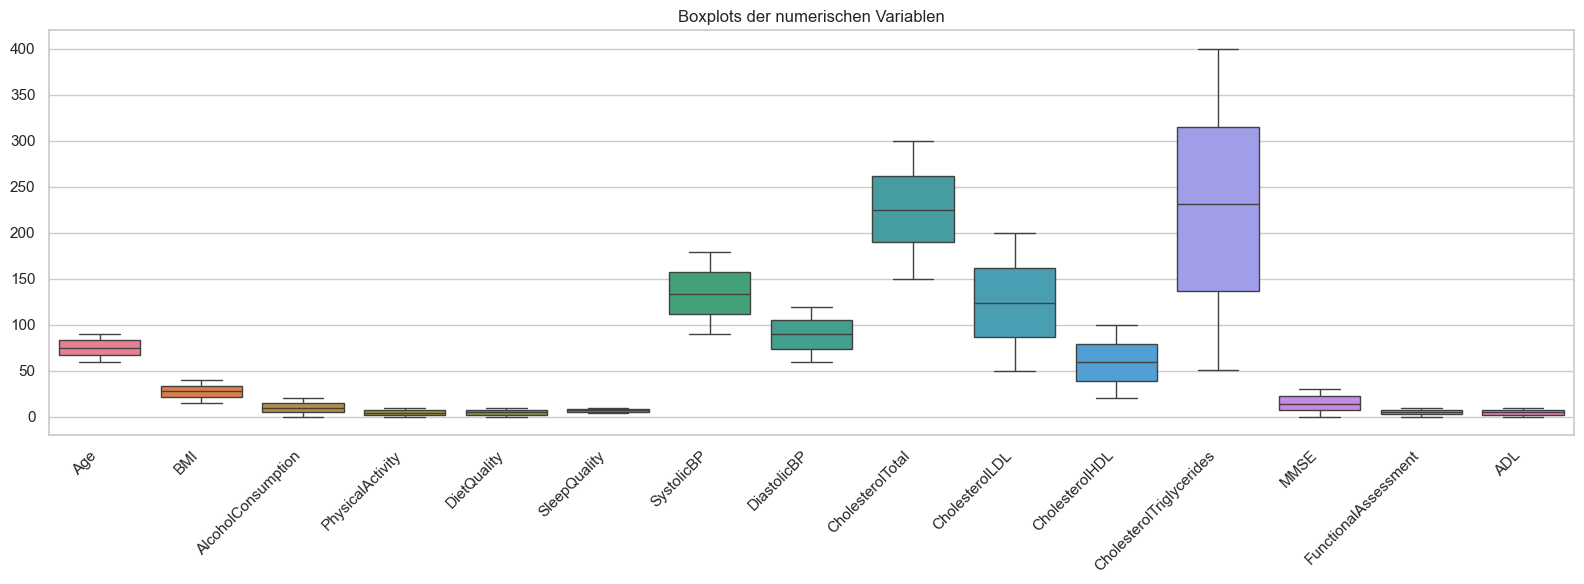

In [ ]:
# visualize mean median sd in boxplots
# sns.boxplot(df[column_numerical]) # but we want it nicer

# set figure size
plt.figure(figsize=(16, 6)) 

sns.boxplot(data=df[column_numerical])

# make it nice
plt.xticks(rotation=45, ha='right')  # turns y values
plt.title('Boxplots der numerischen Variablen')
plt.tight_layout()
plt.show()

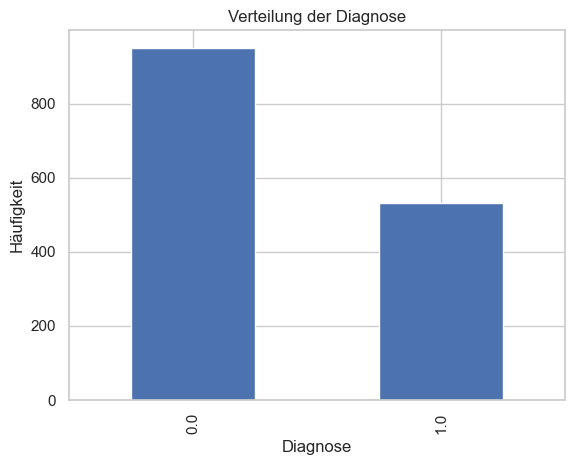

951
531


In [ ]:
# Analysis of the target variable
# --> Class distribution because target value is 0 or 1 (with or without alzheimer)

# show distribution of target variable alzheimer
df['Diagnosis'].value_counts().plot(kind='bar')
plt.title('Verteilung der Diagnose')
plt.xlabel('Diagnose')
plt.ylabel('Häufigkeit')
plt.show()
# more without alzheimer than with

# count how many people with and without alzheimer (Diagnosis == 0 / Diagnosis == 1)
print(df[df['Diagnosis'] == 0].shape[0])
print(df[df['Diagnosis'] == 1].shape[0])
# there is more without alzheimer: 951 than with: 531
# there is a clear class imbalance
# this imbalance can negatively affect classification performance, particularly if a model learns to overpredict the 
# majority class (e.g., always guessing "no Alzheimer" to boost accuracy).

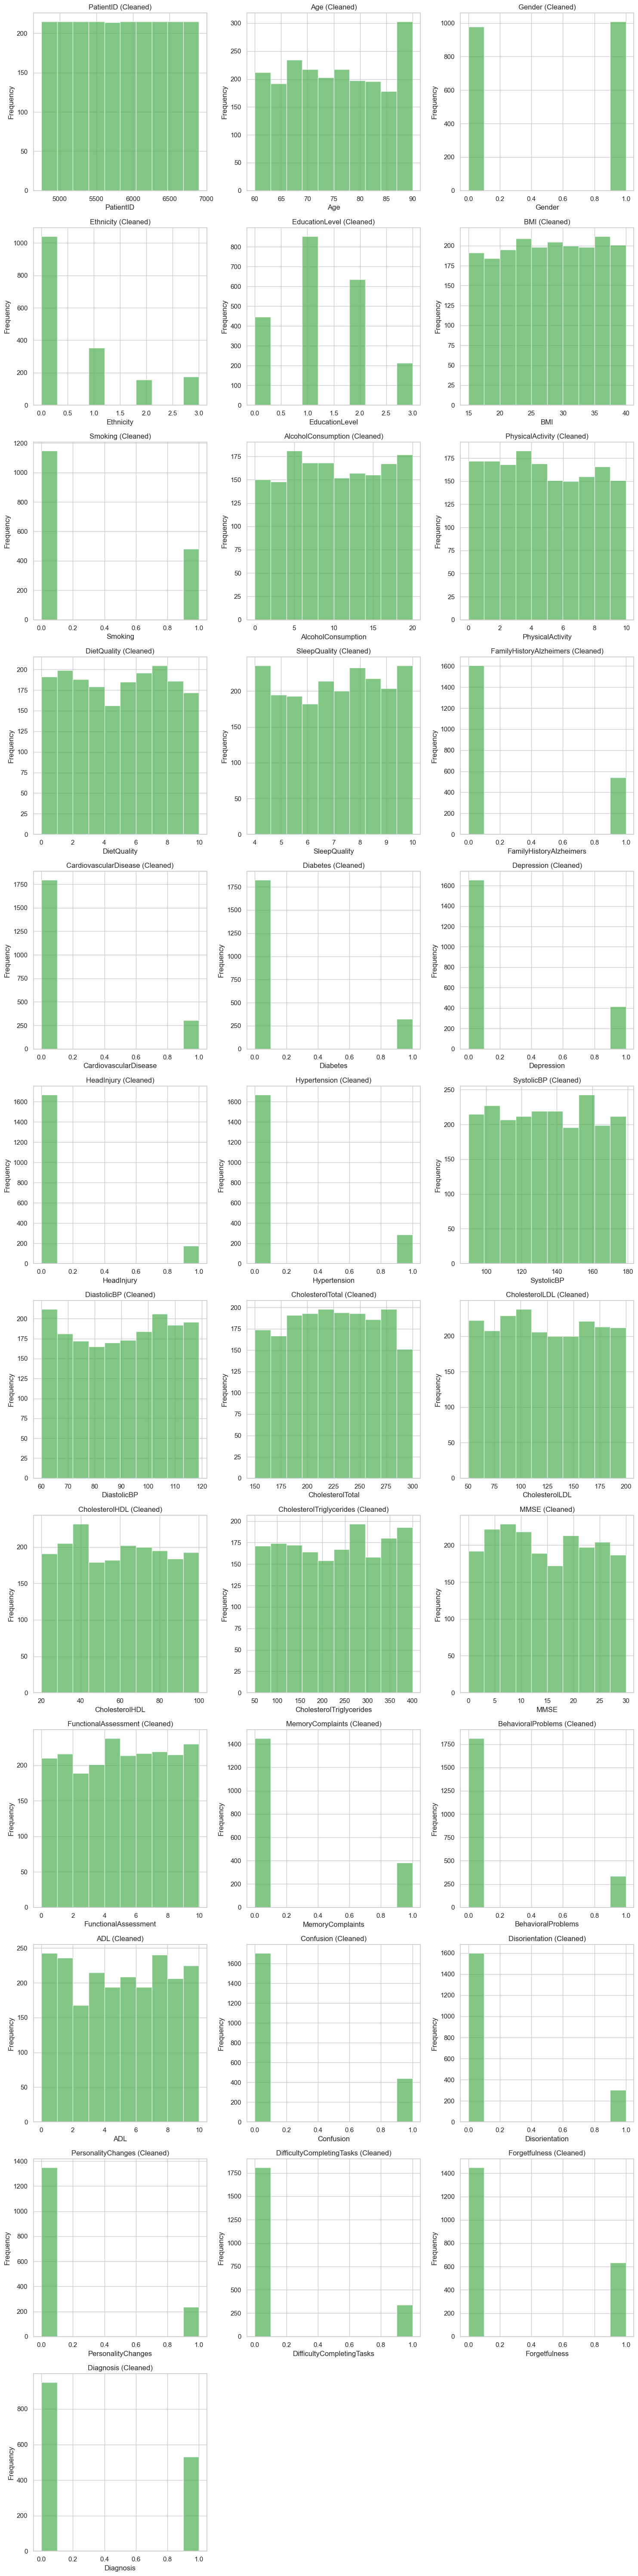

In [66]:
# outliers

# Get the Descriptive Statistics
df.describe()
df["SystolicBP"].describe()

# no inplausible values found

# Load Library
import math
import matplotlib.pyplot as plt
import seaborn as sns
# Set up Plotting
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
n = len(numerical_columns)
nrows = math.ceil(n / 3)
# Histograms
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()

# Load Library
for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column].dropna(), bins=10, alpha=0.7, color="#4CAF50")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f"{column} (Cleaned)")
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

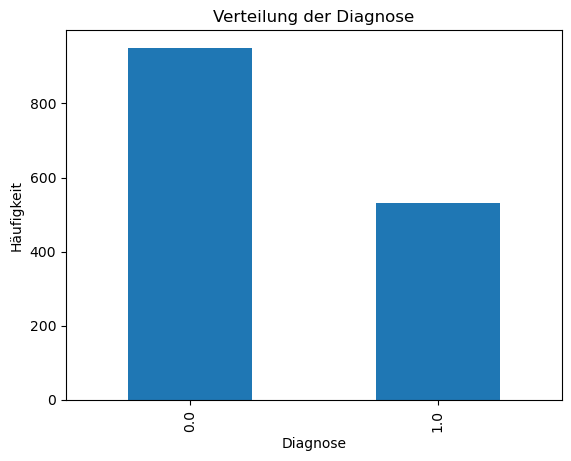

951
531


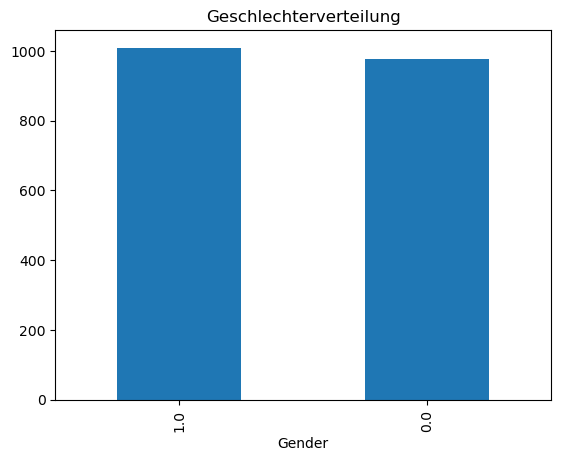

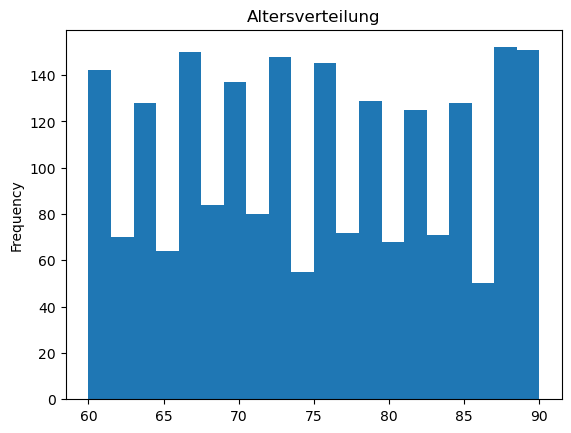

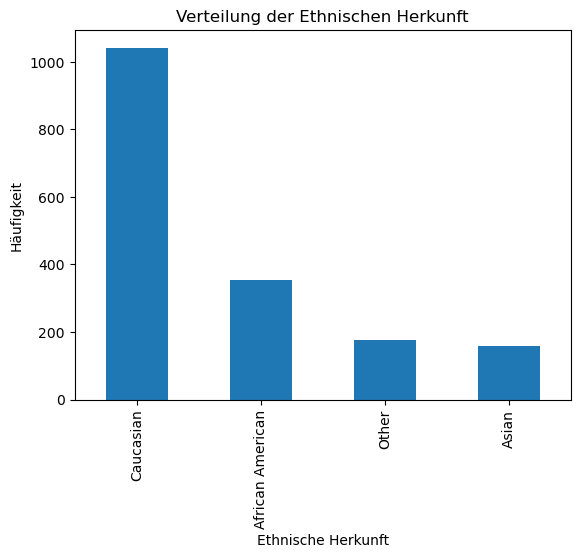

In [ ]:
# further look into possible inbalances

# show gender distribution
df['Gender'].value_counts().plot(kind='bar', title="Geschlechterverteilung")
plt.show()

# show age distribution
df['Age'].plot(kind='hist', bins=20, title="Altersverteilung")
plt.show()


# Mapping numerical values to the ethnicity values
ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

# Add column Ethnicity_Label
df['Ethnicity_Label'] = df['Ethnicity'].map(ethnicity_mapping)

# plot
df['Ethnicity_Label'].value_counts().plot(kind='bar', title="Verteilung der Ethnischen Herkunft")
plt.xlabel('Ethnische Herkunft')
plt.ylabel('Häufigkeit')
plt.show()